In [3]:
%matplotlib notebook

from modsim import *

In [4]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [5]:
#mass of person
mass = 62.1422

In [6]:
#constants
g = 9.81
k_trampoline = 200

In [7]:
#starting conditions
init = State(y = 0,
             v = 3)

In [8]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [9]:
system = System(init=init, g=g, ts=ts)

In [10]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [11]:
slope_func(init, 0 , system)

(3, -9.81)

In [12]:
run_odeint(system, slope_func)

In [37]:
system.results.tail

<bound method NDFrame.tail of                      y         v
0.000000  0.000000e+00  3.000000
0.010027  2.958660e-02  2.901639
0.020053  5.818698e-02  2.803279
0.030080  8.580114e-02  2.704918
0.040106  1.124291e-01  2.606557
0.050133  1.380708e-01  2.508197
0.060159  1.627263e-01  2.409836
0.070186  1.863956e-01  2.311475
0.080213  2.090786e-01  2.213115
0.090239  2.307755e-01  2.114754
0.100266  2.514861e-01  2.016393
0.110292  2.712105e-01  1.918033
0.120319  2.899487e-01  1.819672
0.130345  3.077007e-01  1.721311
0.140372  3.244664e-01  1.622951
0.150399  3.402459e-01  1.524590
0.160425  3.550392e-01  1.426230
0.170452  3.688463e-01  1.327869
0.180478  3.816672e-01  1.229508
0.190505  3.935018e-01  1.131148
0.200531  4.043502e-01  1.032787
0.210558  4.142124e-01  0.934426
0.220585  4.230884e-01  0.836066
0.230611  4.309782e-01  0.737705
0.240638  4.378817e-01  0.639344
0.250664  4.437990e-01  0.540984
0.260691  4.487301e-01  0.442623
0.270717  4.526750e-01  0.344262
0.280744  4.5

In [14]:
def plot_position(results, x = ''):
    plot(results.y, label = x)
    legend = False
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)',
            legend = False)

<IPython.core.display.Javascript object>


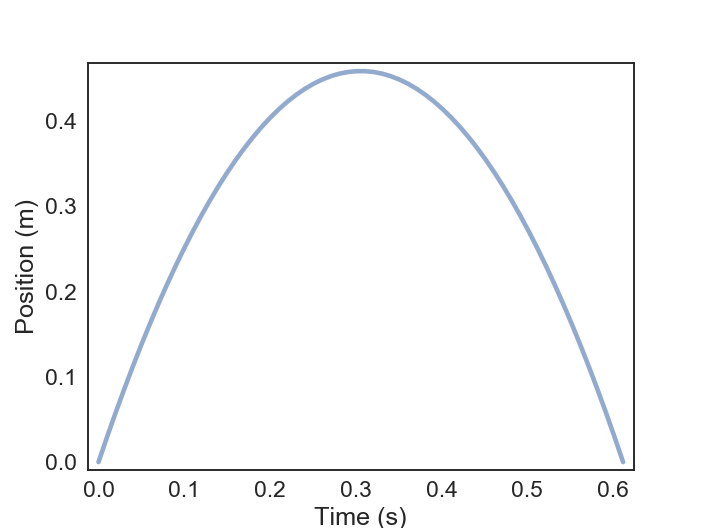

In [15]:
newfig()
plot_position(system.results)

In [16]:
d = 0.45859872611464

In [17]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

929.07606569715108

In [18]:
k = 0

In [19]:
#legs
x = .2
leg_PE = 1/2 * k * x**2

In [20]:
Total_PE = tramp_PE + leg_PE

In [21]:
v_up = sqrt(2 * Total_PE / mass)

In [22]:
init_up = State(y = 0,
                v = v_up)

In [23]:
duration_up = v_up/g + duration

In [24]:
ts_up = linrange(duration, duration_up, .01)

In [25]:
system_up = System(init=init_up, g=g, ts=ts_up)

In [26]:
slope_func(init_up, 0, system_up)

(5.4682369066363616, -9.81)

In [27]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


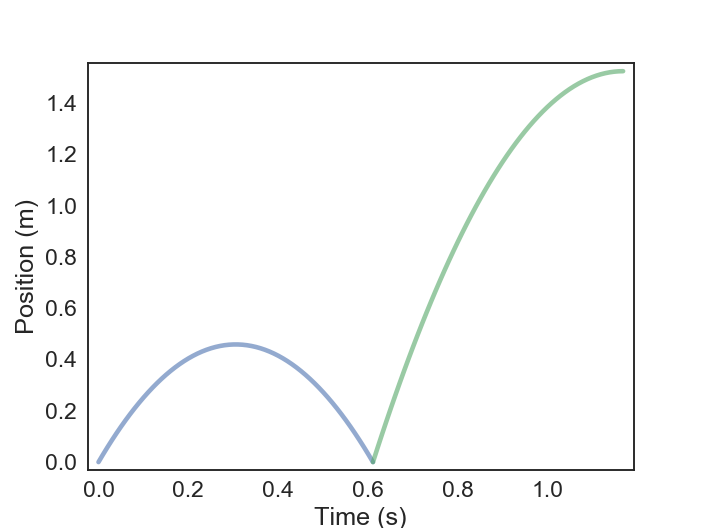

Saving figure to file no legs.pdf


In [28]:
newfig()
plot_position(system.results)
plot_position(system_up.results)
savefig('no legs.pdf')

In [75]:
k_values = linspace(.1, 100000, 21)
sweep = SweepSeries()

In [76]:
def plot_sweep():
    newfig()
    plot_position(system.results)
    for k in k_values:
        x = .2
        leg_PE = 1/2 * k * x**2
        Total_PE = tramp_PE + leg_PE
        v_up = sqrt(2 * Total_PE / mass)
        init_up = State(y = 0,
                        v = v_up)
        duration_up = v_up/g + duration
        ts_up = linrange(duration, duration_up, .01)
        system_up = System(init=init_up, g=g, ts=ts)
        slope_func(init_up, 0, system_up)
        run_odeint(system_up, slope_func)
        sweep[k] = system_up.results
        plot_position(sweep[k], int(k))
    

<IPython.core.display.Javascript object>


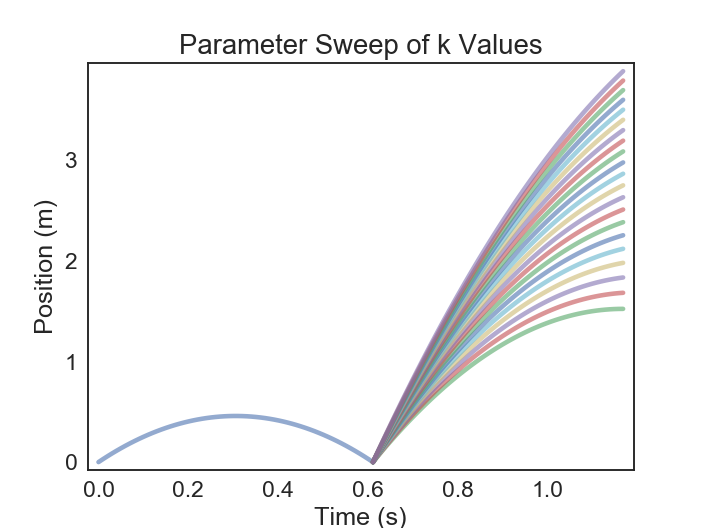

Saving figure to file Param Sweep.pdf


In [77]:
plot_sweep()
decorate(title = 'Parameter Sweep of k Values', legend = False)
savefig('Param Sweep.pdf')

In [78]:
k_values

array([  1.00000000e-01,   5.00009500e+03,   1.00000900e+04,
         1.50000850e+04,   2.00000800e+04,   2.50000750e+04,
         3.00000700e+04,   3.50000650e+04,   4.00000600e+04,
         4.50000550e+04,   5.00000500e+04,   5.50000450e+04,
         6.00000400e+04,   6.50000350e+04,   7.00000300e+04,
         7.50000250e+04,   8.00000200e+04,   8.50000150e+04,
         9.00000100e+04,   9.50000050e+04,   1.00000000e+05])

In [79]:
def run_simulation(k):
    x = 0.2
    leg_PE = 1/2 * k * x**2
    Total_PE = tramp_PE + leg_PE
    final_height = Total_PE / (mass * g)
    return final_height    

In [80]:
for k in k_values:
    x = .2
    leg_PE = 1/2 * k * x**2
    print(leg_PE)

0.002
100.0019
200.0018
300.0017
400.0016
500.0015
600.0014
700.0013
800.0012
900.0011
1000.001
1100.0009
1200.0008
1300.0007
1400.0006
1500.0005
1600.0004
1700.0003
1800.0002
1900.0001
2000.0


In [81]:
for k in k_values:
    height = run_simulation(k)
    print (height)

1.52404073576
1.68807853495
1.85211633414
2.01615413333
2.18019193252
2.3442297317
2.50826753089
2.67230533008
2.83634312927
3.00038092846
3.16441872765
3.32845652684
3.49249432603
3.65653212522
3.82056992441
3.9846077236
4.14864552279
4.31268332197
4.47672112116
4.64075892035
4.80479671954


In [83]:
k_values = linspace(.1, 100, 21)

In [84]:
def height_sweep_plot():
    newfig()
    for k in k_values_2:
        height = run_simulation(k)
        plot(k, height, 'r-')
        

<IPython.core.display.Javascript object>


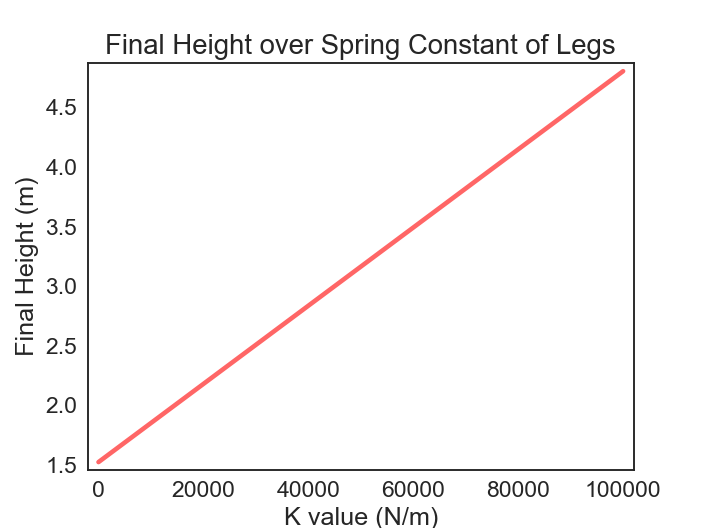

Saving figure to file Final Height Sweep.eps
Saving figure to file Final Height Sweep.pdf


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [87]:
height_sweep_plot()
decorate (xlabel = 'K value (N/m)',
          ylabel = 'Final Height (m)',
          title = 'Final Height over Spring Constant of Legs')
savefig('Final Height Sweep.eps')
savefig('Final Height Sweep.pdf')